# Euphoria Project: Understanding Island Happiness
Made only by Matteo Bruni

Steps to Address the Assignment
EDA with Visualization:

Understand the distribution of numeric variables.
Analyze the correlation between variables.
Explore categorical variable distributions and their relationships with happiness_index.
Problem Definition:

Determine whether the task is regression, classification, or clustering based on happiness_index or other potential outcomes.
Preprocessing:

Handle missing values.
Encode categorical variables.
Normalize/scale numeric variables.
Identify and handle outliers.
Model Selection:

Test three different models, such as K-Means (clustering), Decision Trees (classification), and Linear Regression (regression).
Validate models using cross-validation and tune hyperparameters.
Performance Metrics:

Choose appropriate metrics for the task, such as Silhouette Score (clustering), Accuracy (classification), or R² (regression).
Test Set Evaluation:

Split data into training and testing sets.
Evaluate the final model on the test set.
Comparison and Documentation:

Compare model performance.
Summarize findings and methodologies in a report.

## Context
In the virtual world of **Euphoria**, an expansive digital archipelago, each island offers unique experiences and environments to its inhabitants. This project aims to explore and understand the characteristics that contribute to the happiness of island residents. By segmenting islands based on happiness levels, we can help similar travelers find their ideal destinations within Euphoria.

### Goals
- Identify key factors influencing the happiness levels on different islands.
- Segment islands to create traveler profiles, matching visitors to islands with similar features and happiness scores.
- Explore geographic, environmental, and amenity-based patterns to understand how these elements correlate with happiness and loyalty.

### Key Metrics
- **Happiness Index**: A measure of overall happiness among island inhabitants.
- **Loyalty Score**: Indicates retention and loyalty of visitors or residents on each island.
- **Total Refunds Requested**: Serves as an indirect measure of satisfaction or dissatisfaction.
- **Average Time in Euphoria**: Reflects the typical duration visitors spend on each island, indicating attraction levels.
- **Geographical Features**: Variables such as region, fauna-friendliness, and availability of water sources.

These metrics and characteristics will guide our exploratory data analysis (EDA) and inform our approach to clustering islands based on their happiness levels.


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)  # Allow full column width display
pd.set_option('display.colheader_justify', 'right')  # Align column headers to the left (for header alignment only)
pd.set_option('display.width', 1000)         # Set a larger width for the entire display

# Load the dataset to inspect its structure and content
euphoria_data = pd.read_csv("euphoria.csv")

# Display basic information and the first few rows to understand the dataset
euphoria_data.info(), euphoria_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   referral_friends         89572 non-null  float64
 1   water_sources            89536 non-null  float64
 2   shelters                 89382 non-null  float64
 3   fauna_friendly           35163 non-null  object 
 4   island_size              89578 non-null  float64
 5   creation_time            89462 non-null  float64
 6   region                   89306 non-null  object 
 7   happiness_metric         89566 non-null  object 
 8   features                 75035 non-null  object 
 9   happiness_index          89455 non-null  float64
 10  loyalty_score            89546 non-null  float64
 11  total_refunds_requested  89705 non-null  float64
 12  trade_goods              89673 non-null  object 
 13  x_coordinate             89491 non-null  float64
 14  avg_time_in_euphoria  

(None,
    referral_friends  water_sources  shelters fauna_friendly  island_size  creation_time region happiness_metric                                                                                           features  happiness_index  loyalty_score  total_refunds_requested trade_goods  x_coordinate  avg_time_in_euphoria  y_coordinate     island_id entry_fee  nearest_city
 0               3.0            2.0       2.0      Cats,Dogs        892.0   1.568754e+09     TX          Monthly                                  AC,Clubhouse,Fireplace,Parking,Patio/Deck,Playground,Pool,Storage           1014.0            2.0                      1.0         USD       32.8239                 39.84      -96.6810  5.508811e+09        No        Dallas
 1               2.0            2.0       3.0            NaN       1322.0   1.553720e+09     PA          Monthly                                                                                            Parking           2700.0            2.0            

C:\Users\matte\AppData\Local\Temp\ipykernel_11952\2914352884.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


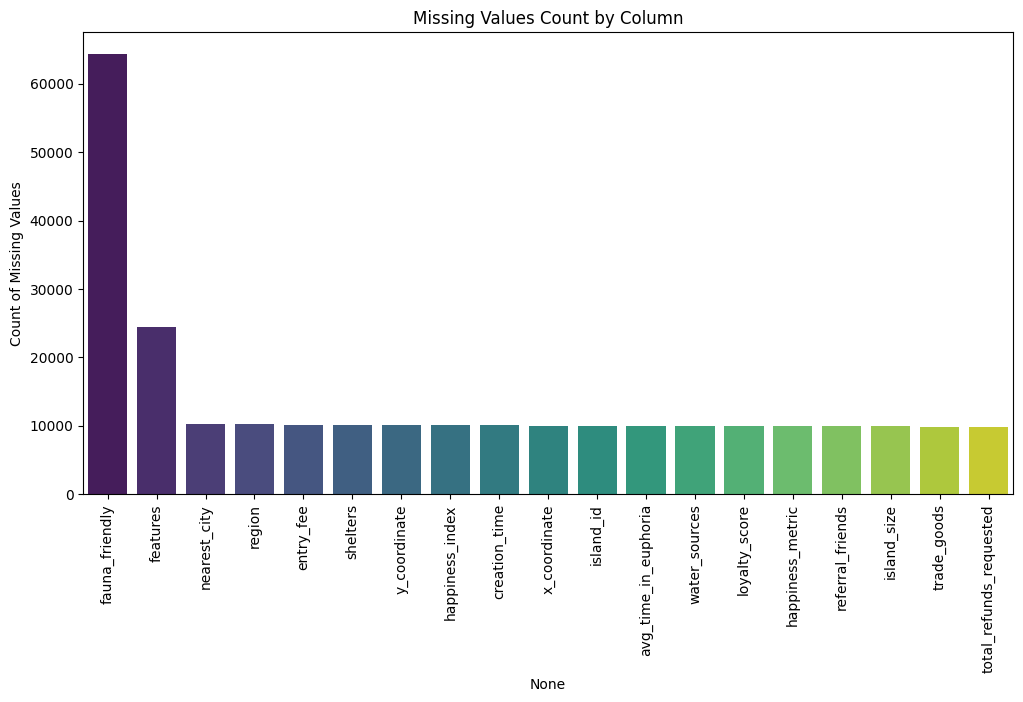

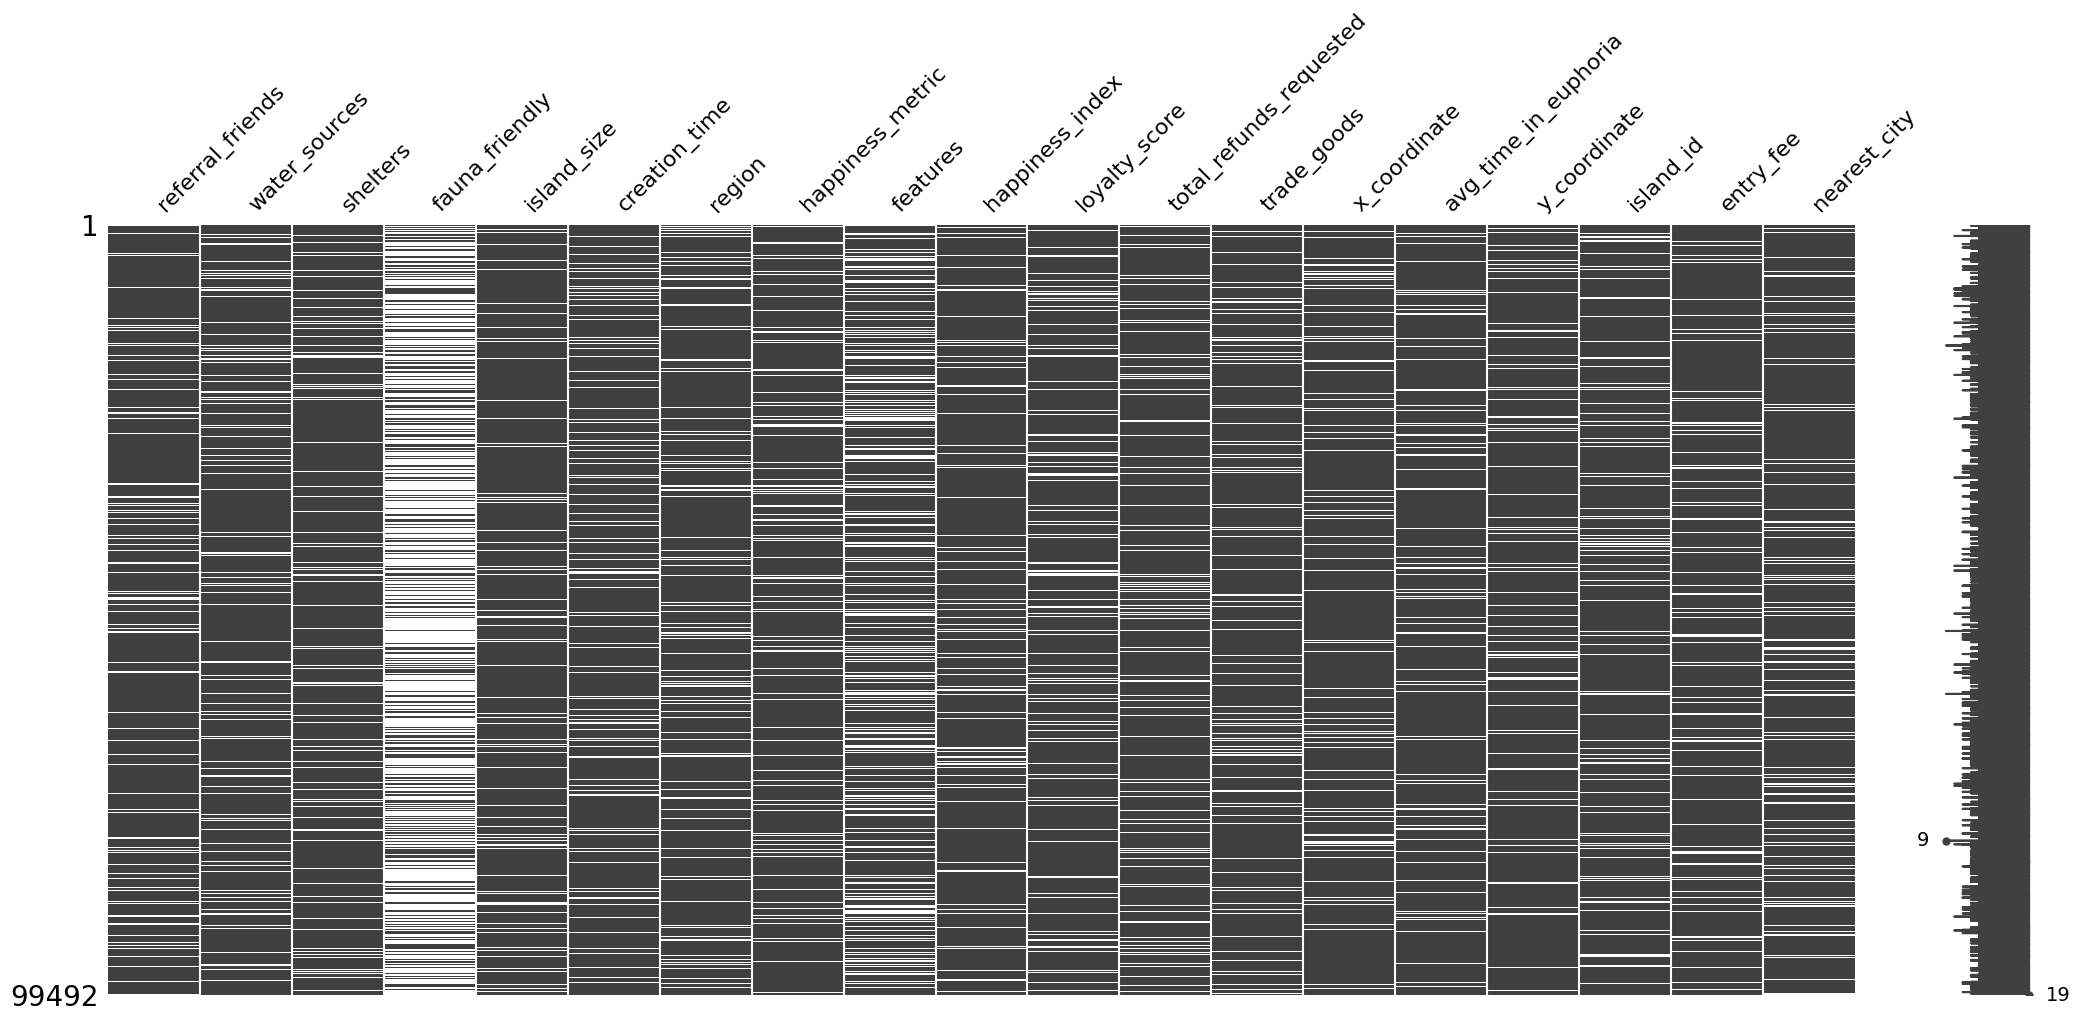

In [13]:
# Check for missing values in each column
missing_values = euphoria_data.isnull().sum().sort_values(ascending=False)

# Display missing value counts
missing_values

# Visualizing missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.title("Missing Values Count by Column")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=90)
plt.show()

import missingno as msno
p=msno.matrix(euphoria_data)


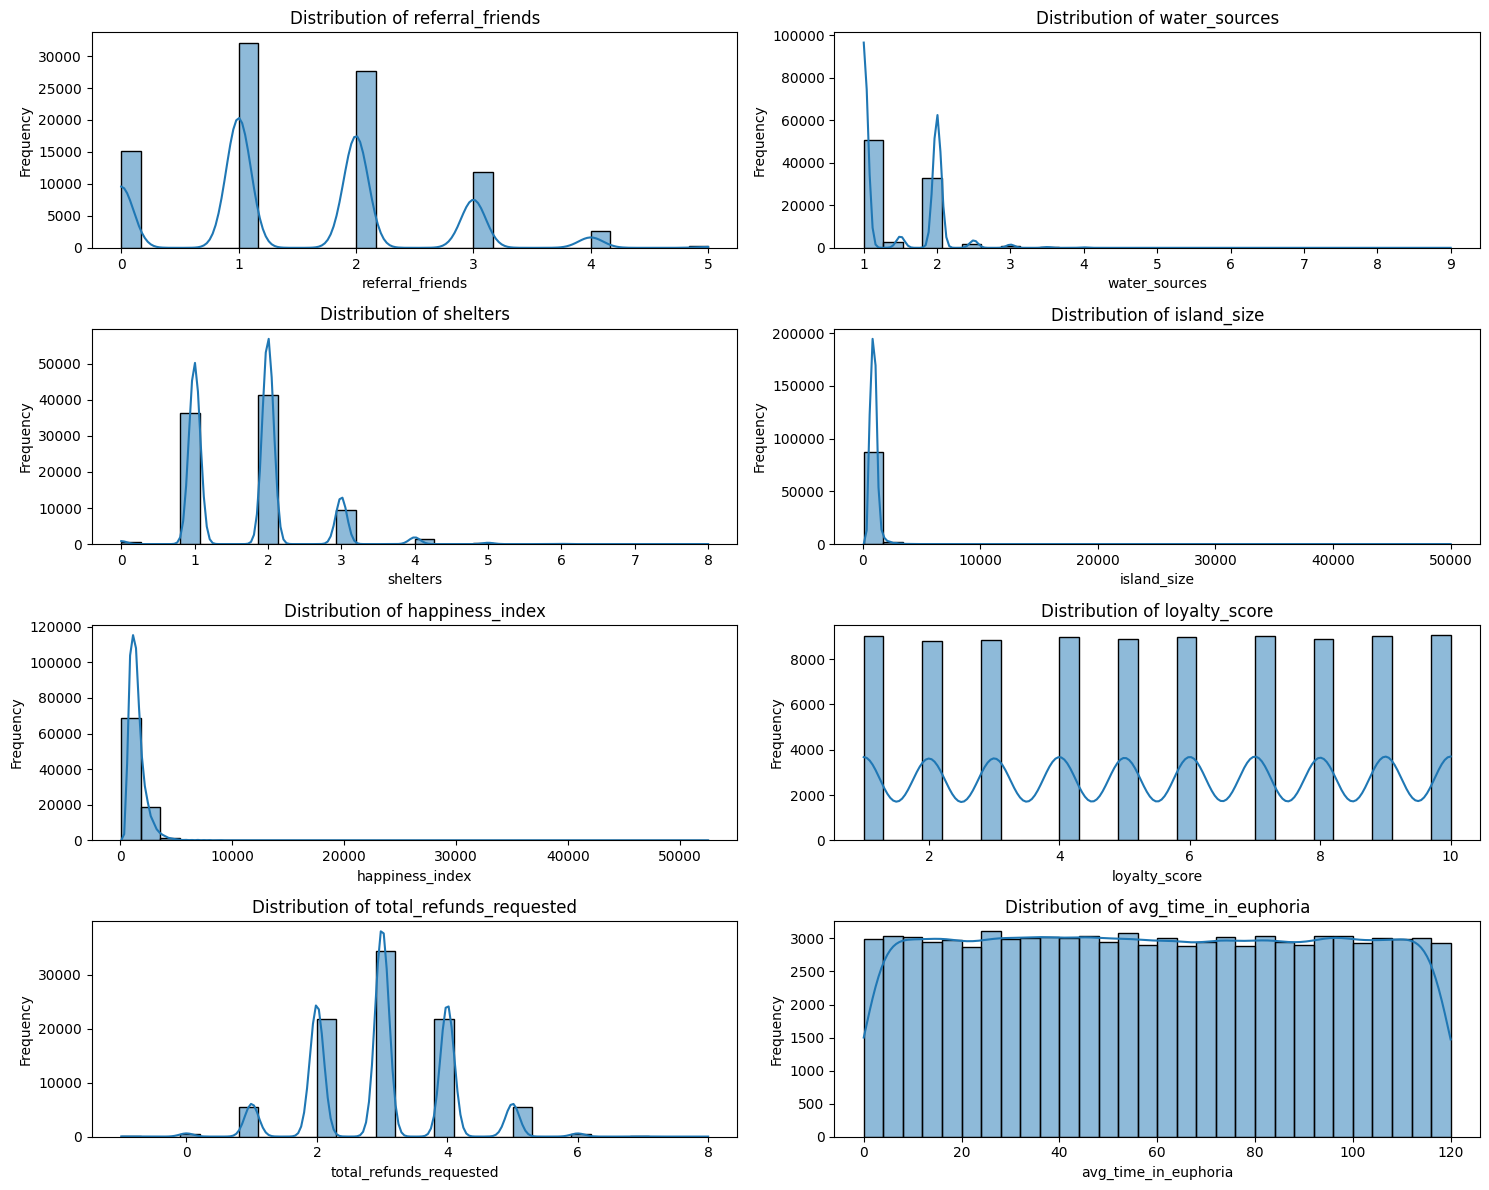

In [4]:
# Plot distributions of key numeric variables
numeric_columns = ['referral_friends', 'water_sources', 'shelters', 'island_size', 
                   'happiness_index', 'loyalty_score', 'total_refunds_requested', 
                   'avg_time_in_euphoria']

# Create subplots for distribution plots
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(euphoria_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Finding Outliers

In [8]:
# Define numeric and categorical columns
numeric_cols = ['referral_friends', 'water_sources', 'shelters', 'island_size', 
                'happiness_index', 'loyalty_score', 'total_refunds_requested', 
                'avg_time_in_euphoria']
categorical_cols = ['fauna_friendly', 'region', 'happiness_metric', 
                    'trade_goods', 'entry_fee', 'nearest_city']


outliers = {}
for col in numeric_cols:
    Q1 = euphoria_data[col].quantile(0.25)
    Q3 = euphoria_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = euphoria_data[(euphoria_data[col] < lower_bound) | (euphoria_data[col] > upper_bound)].index

# Count outliers in each column
outlier_counts = {col: len(idx) for col, idx in outliers.items()}

# Display the results
outlier_counts

{'referral_friends': 2793,
 'water_sources': 187,
 'shelters': 1668,
 'island_size': 2563,
 'happiness_index': 4227,
 'loyalty_score': 0,
 'total_refunds_requested': 1,
 'avg_time_in_euphoria': 0}

### Handling Outliers

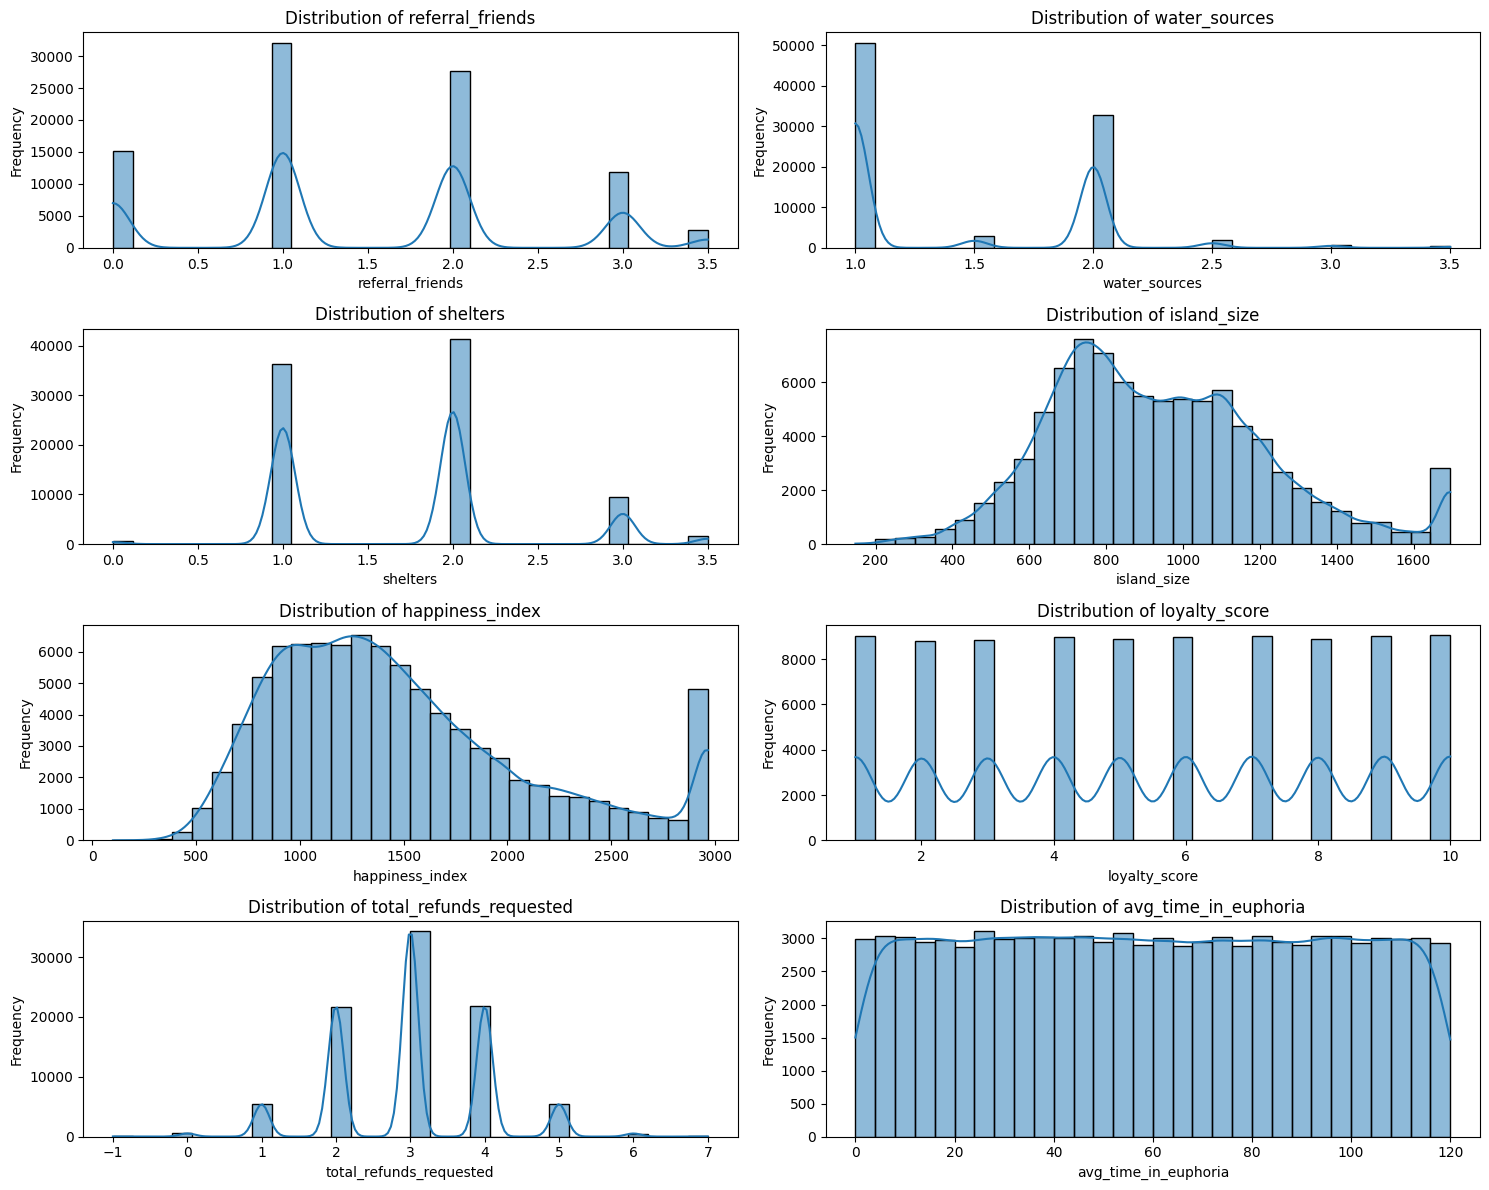

In [17]:
# Function to cap outliers using IQR
def cap_outliers(df, numeric_columns):
    """
    Detect and cap outliers using the IQR method.
    Outliers are capped at the lower and upper boundaries.
    """
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap values outside the bounds
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

# Apply the function to cap outliers in the dataset
euphoria_data_fixed_outliers = cap_outliers(euphoria_data.copy(), numeric_cols)

# Verify that no values exceed the IQR boundaries
outliers_after_capping = {}
for col in numeric_cols:
    Q1 = euphoria_data_fixed_outliers[col].quantile(0.25)
    Q3 = euphoria_data_fixed_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_after_capping[col] = euphoria_data_fixed_outliers[
        (euphoria_data_fixed_outliers[col] < lower_bound) | 
        (euphoria_data_fixed_outliers[col] > upper_bound)].shape[0]

outliers_after_capping

# Create subplots for distribution plots
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(euphoria_data_fixed_outliers[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



### Handling Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   referral_friends         99492 non-null  float64
 1   water_sources            99492 non-null  float64
 2   shelters                 99492 non-null  float64
 3   fauna_friendly           99492 non-null  object 
 4   island_size              99492 non-null  float64
 5   creation_time            89462 non-null  float64
 6   region                   99492 non-null  object 
 7   happiness_metric         99492 non-null  object 
 8   features                 99492 non-null  object 
 9   happiness_index          99492 non-null  float64
 10  loyalty_score            99492 non-null  float64
 11  total_refunds_requested  99492 non-null  float64
 12  trade_goods              99492 non-null  object 
 13  x_coordinate             89491 non-null  float64
 14  avg_time_in_euphoria  

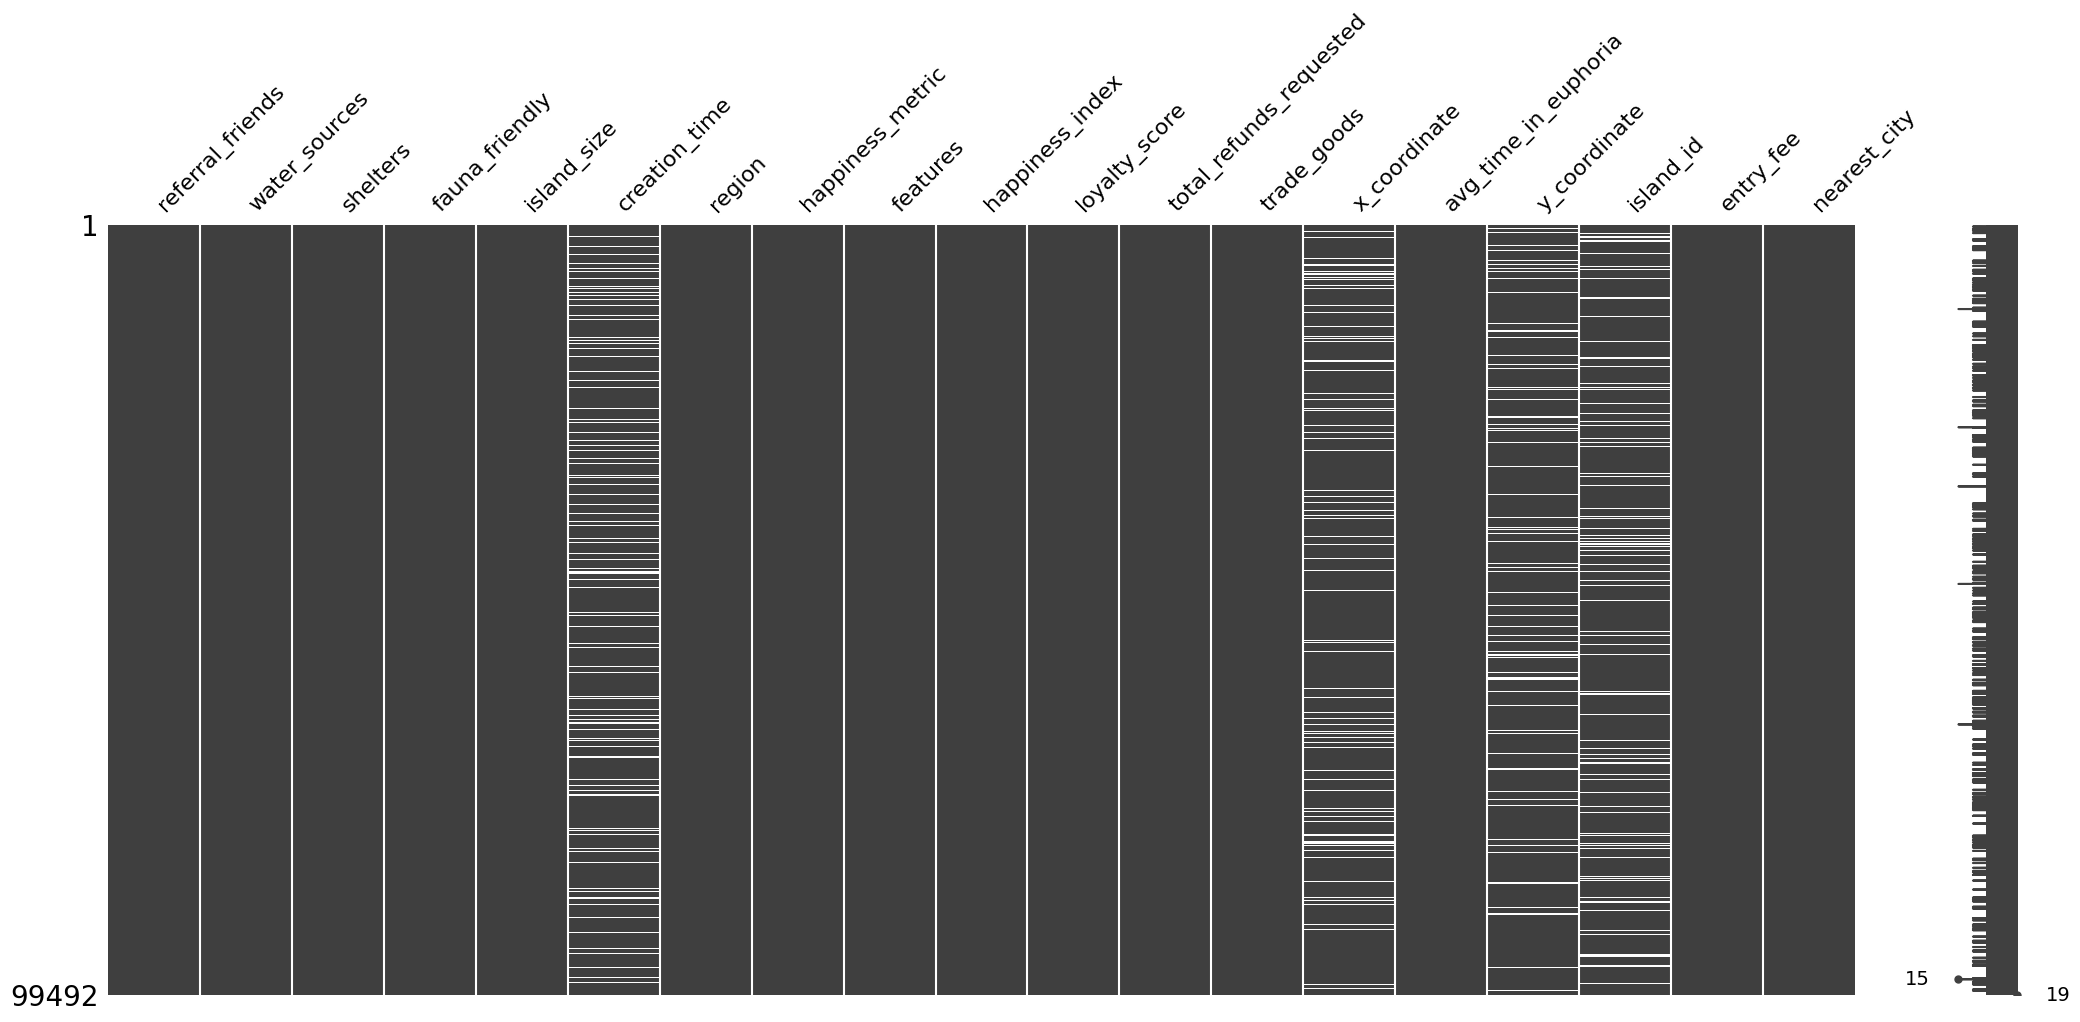

In [27]:
# Handle missing values for categorical columns by assigning "Unknown"
categorical_cols_with_missing = [col for col in categorical_cols if euphoria_data[col].isnull().sum() > 0]
for col in categorical_cols_with_missing:
    euphoria_data[col] = euphoria_data[col].fillna("Unknown")

# Handle missing values for numeric columns by imputing with the median
numeric_cols_with_missing = [col for col in numeric_cols if euphoria_data[col].isnull().sum() > 0]
for col in numeric_cols_with_missing:
    median_value = euphoria_data[col].median()
    euphoria_data[col] = euphoria_data[col].fillna(median_value)

# Remove columns with excessive missing values (>50% missing)
threshold = 0.5 * len(euphoria_data)
columns_to_drop = [col for col in euphoria_data.columns if euphoria_data[col].isnull().sum() > threshold]
euphoria_data = euphoria_data.drop(columns=columns_to_drop, axis=1)

# Replace "Unknown" with "None" in 'fauna_friendly' and 'features'
euphoria_data['fauna_friendly'] = euphoria_data['fauna_friendly'].replace("Unknown", "None")
if 'features' in euphoria_data.columns:
    euphoria_data['features'] = euphoria_data['features'].fillna("None")

# Verify the changes
euphoria_data[['fauna_friendly', 'features']].head()

# Check if any missing values remain in the dataset
remaining_missing_values = euphoria_data.isnull().sum().sum()

# Output the results
remaining_missing_values, euphoria_data.info()
p=msno.matrix(euphoria_data)

### Correlation Matrix

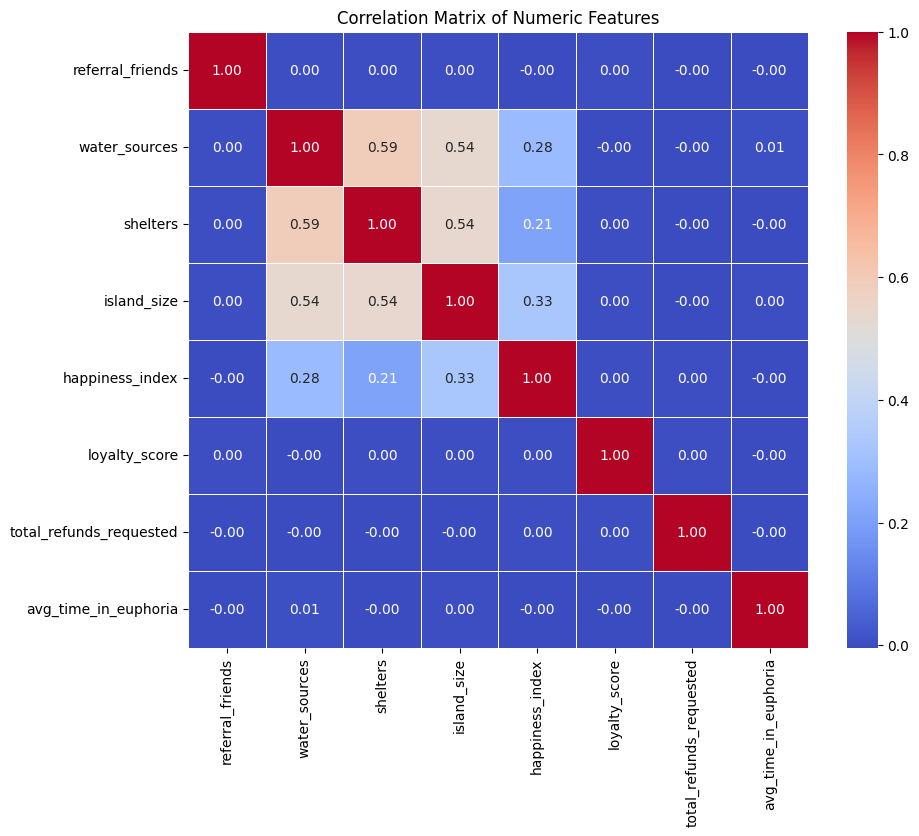

In [28]:
# Compute correlation matrix for numeric columns
correlation_matrix = euphoria_data[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

